# Test

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from learn import *
sys.path.insert(0, 'code')
from v17 import *
from v17 import _internal_validate_predict_best_param

In [3]:
sz = 256
num_slice = 9

num_gpus = 2
gpu_start = 0
num_workers = 8
# device_ids = range(gpu_start, gpu_start + num_gpus)
device_ids = [0,1,4,5]
torch.cuda.set_device(gpu_start)
bs = 15

## Preprocessing

In [4]:
datapaths = ['data/train/AOI_2_Vegas_Train', 'data/train/AOI_3_Paris_Train', 'data/train/AOI_4_Shanghai_Train', 'data/train/AOI_5_Khartoum_Train']
# !python code/v5_im-full_rgb.py preproc_test {datapaths[0]}

In [5]:
# !python code/v5_im-full_rgb.py preproc_test {datapaths[3]}

In [6]:
# !python code/v5_im-full_rgb.py preproc_test {datapaths[1]}
# !python code/v5_im-full_rgb.py preproc_test {datapaths[2]}

## Find threshold

In [92]:
model_name = 'deeplab'
data = None

In [168]:
learn, denorm, data = learner_on_dataset(datapaths[1], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=False, data=data, num_slice=num_slice, sz=sz,
                                        is_pred=False)
(trn_x,trn_y), (val_x,val_y) = data

Data finished loading: data/train/AOI_3_Paris_Train


In [52]:
learn.load('deeplab-paris')

In [53]:
%%time
preds = learn.predict().squeeze()

CPU times: user 26min 18s, sys: 2min 24s, total: 28min 42s
Wall time: 1min 4s


In [169]:
%%time
with ThreadPoolExecutor(max_workers=8) as e:
    x, y = list(zip(*list(e.map(learn.data.val_dl.get_batch, [[o] for o in range(preds.shape[0])]))))

CPU times: user 38.4 s, sys: 7.36 s, total: 45.7 s
Wall time: 3.84 s


In [170]:
x, y, preds = [np.squeeze(o) for o in (x, y, preds)]

In [101]:
scores = None

[0.53256 0.53234 0.53101 0.53064 0.5306  0.53059 0.53053 0.53032 0.5295 ]


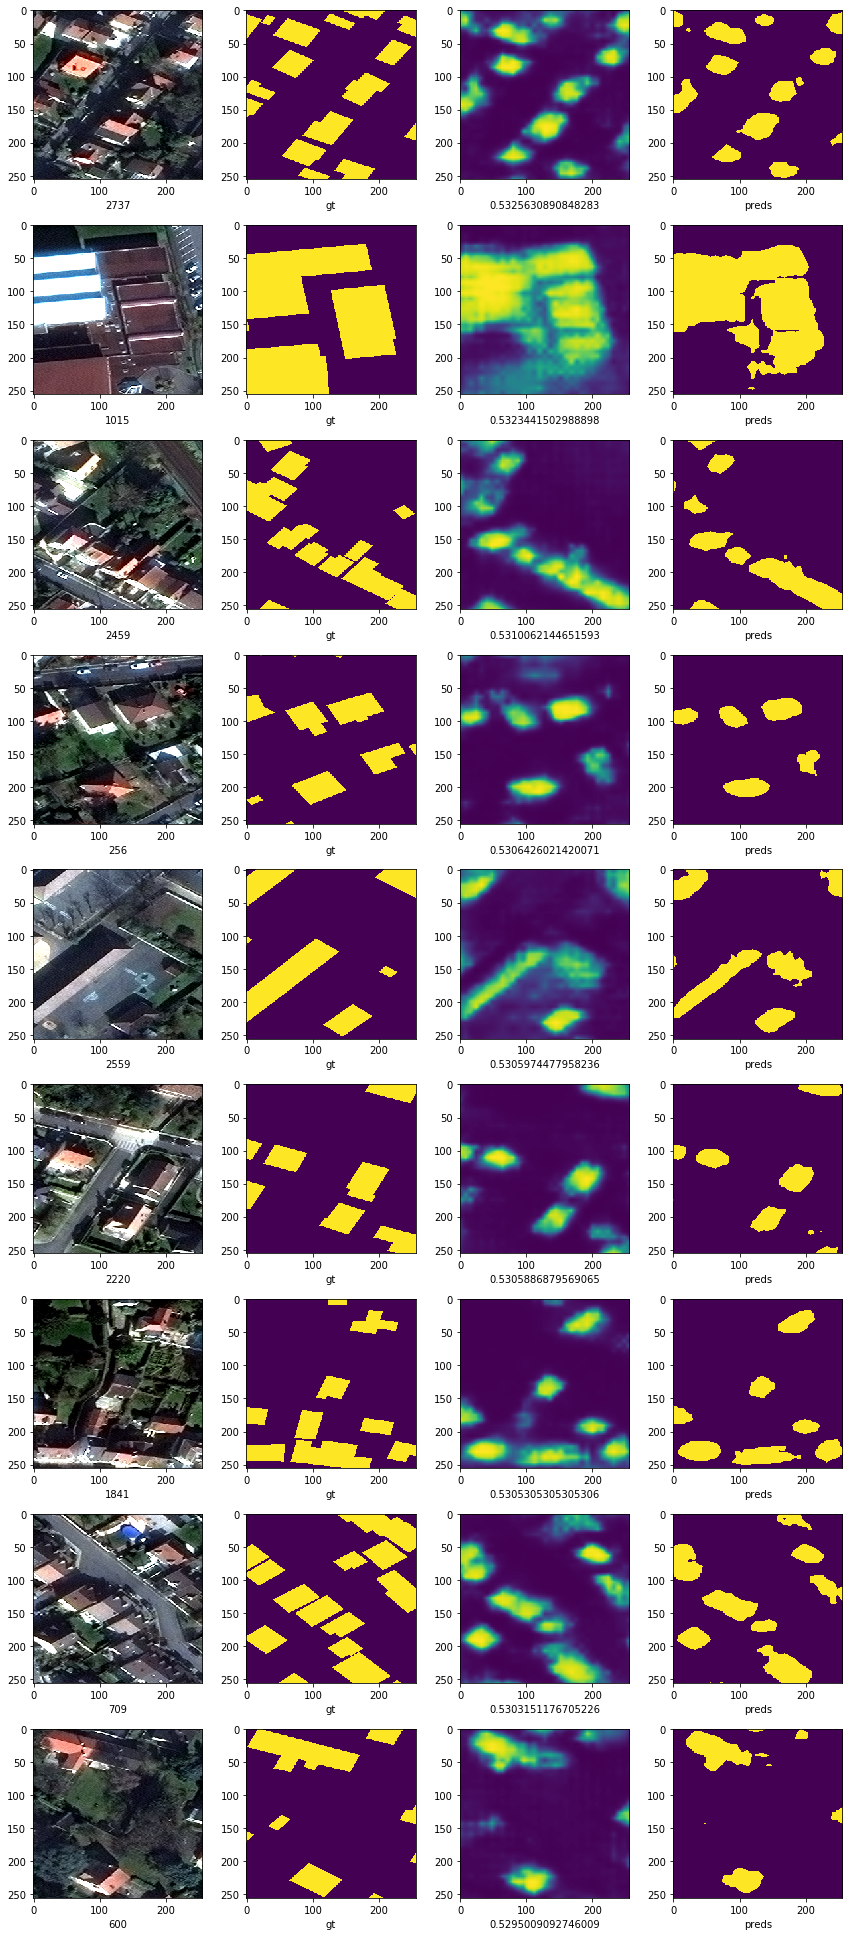

In [110]:
scores, idx = plot_worse_preds(x, y, preds, learn, jaccard_coef, shift=2500,
                          scores=scores, is_best=1, thresh=0.5)

In [ ]:
evalfscore(datapaths[1], preds>0.5)

(345, 650, 650)


In [5]:
ret = " - Reading your solution from [data/working/models/v17/AOI_3_Paris_eval_poly.csv] ...\n - Reading truth file from [data/working/models/v17/AOI_3_Paris_eval_poly_truth.csv] ...\nCan't find image folder pass/PAN\nDetails:\nAOI_3_Paris_img10\n  - not scored\nAOI_3_Paris_img100\n  TP       : 0\n  FP       : 0\n  FN       : 26\n\nAOI_3_Paris_img1000\n  TP       : 0\n  FP       : 0\n  FN       : 44\n\nAOI_3_Paris_img1001\n  TP       : 0\n  FP       : 0\n  FN       : 56\n\nAOI_3_Paris_img1007\n  TP       : 0\n  FP       : 0\n  FN       : 56\n\nAOI_3_Paris_img1009\n  TP       : 0\n  FP       : 2\n  FN       : 11\n\nAOI_3_Paris_img1011\n  TP       : 0\n  FP       : 0\n  FN       : 32\n\nAOI_3_Paris_img1016\n  TP       : 0\n  FP       : 0\n  FN       : 26\n\nAOI_3_Paris_img1017\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img1018\n  - not scored\nAOI_3_Paris_img1021\n  - not scored\nAOI_3_Paris_img1026\n  - not scored\nAOI_3_Paris_img1030\n  - not scored\nAOI_3_Paris_img1047\n  TP       : 0\n  FP       : 0\n  FN       : 29\n\nAOI_3_Paris_img1049\n  TP       : 0\n  FP       : 1\n  FN       : 52\n\nAOI_3_Paris_img1062\n  - not scored\nAOI_3_Paris_img1063\n  - not scored\nAOI_3_Paris_img1069\n  - not scored\nAOI_3_Paris_img1071\n  - not scored\nAOI_3_Paris_img1072\n  - not scored\nAOI_3_Paris_img1074\n  - not scored\nAOI_3_Paris_img1082\n  TP       : 0\n  FP       : 0\n  FN       : 28\n\nAOI_3_Paris_img1086\n  TP       : 0\n  FP       : 5\n  FN       : 58\n\nAOI_3_Paris_img1090\n  TP       : 0\n  FP       : 1\n  FN       : 48\n\nAOI_3_Paris_img1091\n  TP       : 0\n  FP       : 2\n  FN       : 36\n\nAOI_3_Paris_img110\n  TP       : 0\n  FP       : 0\n  FN       : 16\n\nAOI_3_Paris_img1103\n  TP       : 0\n  FP       : 3\n  FN       : 24\n\nAOI_3_Paris_img1109\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img111\n  TP       : 0\n  FP       : 3\n  FN       : 39\n\nAOI_3_Paris_img1120\n  - not scored\nAOI_3_Paris_img1125\n  TP       : 0\n  FP       : 1\n  FN       : 22\n\nAOI_3_Paris_img1129\n  TP       : 0\n  FP       : 3\n  FN       : 23\n\nAOI_3_Paris_img1135\n  TP       : 0\n  FP       : 0\n  FN       : 50\n\nAOI_3_Paris_img1137\n  TP       : 0\n  FP       : 0\n  FN       : 14\n\nAOI_3_Paris_img1142\n  TP       : 0\n  FP       : 1\n  FN       : 43\n\nAOI_3_Paris_img1149\n  TP       : 0\n  FP       : 0\n  FN       : 7\n\nAOI_3_Paris_img1154\n  - not scored\nAOI_3_Paris_img1155\n  - not scored\nAOI_3_Paris_img1156\n  - not scored\nAOI_3_Paris_img1162\n  - not scored\nAOI_3_Paris_img1168\n  - not scored\nAOI_3_Paris_img1173\n  TP       : 0\n  FP       : 3\n  FN       : 5\n\nAOI_3_Paris_img1174\n  TP       : 0\n  FP       : 7\n  FN       : 20\n\nAOI_3_Paris_img1185\n  TP       : 0\n  FP       : 1\n  FN       : 9\n\nAOI_3_Paris_img1187\n  TP       : 0\n  FP       : 0\n  FN       : 44\n\nAOI_3_Paris_img1189\n  TP       : 0\n  FP       : 0\n  FN       : 8\n\nAOI_3_Paris_img1204\n  - not scored\nAOI_3_Paris_img1205\n  - not scored\nAOI_3_Paris_img1208\n  - not scored\nAOI_3_Paris_img121\n  TP       : 0\n  FP       : 1\n  FN       : 36\n\nAOI_3_Paris_img1211\n  - not scored\nAOI_3_Paris_img1219\n  TP       : 0\n  FP       : 0\n  FN       : 40\n\nAOI_3_Paris_img1226\n  TP       : 0\n  FP       : 0\n  FN       : 55\n\nAOI_3_Paris_img1235\n  TP       : 0\n  FP       : 0\n  FN       : 5\n\nAOI_3_Paris_img1240\n  - not scored\nAOI_3_Paris_img1249\n  - not scored\nAOI_3_Paris_img1252\n  - not scored\nAOI_3_Paris_img1258\n  - not scored\nAOI_3_Paris_img1266\n  TP       : 0\n  FP       : 0\n  FN       : 57\n\nAOI_3_Paris_img1273\n  TP       : 0\n  FP       : 0\n  FN       : 10\n\nAOI_3_Paris_img1274\n  TP       : 0\n  FP       : 1\n  FN       : 26\n\nAOI_3_Paris_img1277\n  TP       : 0\n  FP       : 0\n  FN       : 8\n\nAOI_3_Paris_img1278\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img1286\n  - not scored\nAOI_3_Paris_img1292\n  - not scored\nAOI_3_Paris_img1294\n  - not scored\nAOI_3_Paris_img1308\n  TP       : 0\n  FP       : 0\n  FN       : 20\n\nAOI_3_Paris_img1312\n  TP       : 0\n  FP       : 1\n  FN       : 61\n\nAOI_3_Paris_img1330\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img1334\n  - not scored\nAOI_3_Paris_img1337\n  - not scored\nAOI_3_Paris_img1338\n  - not scored\nAOI_3_Paris_img1352\n  - not scored\nAOI_3_Paris_img1368\n  TP       : 0\n  FP       : 0\n  FN       : 15\n\nAOI_3_Paris_img1378\n  - not scored\nAOI_3_Paris_img1389\n  - not scored\nAOI_3_Paris_img1394\n  - not scored\nAOI_3_Paris_img1397\n  - not scored\nAOI_3_Paris_img14\n  - not scored\nAOI_3_Paris_img1405\n  TP       : 0\n  FP       : 0\n  FN       : 27\n\nAOI_3_Paris_img1413\n  TP       : 0\n  FP       : 3\n  FN       : 36\n\nAOI_3_Paris_img1417\n  TP       : 0\n  FP       : 0\n  FN       : 17\n\nAOI_3_Paris_img142\n  TP       : 0\n  FP       : 2\n  FN       : 45\n\nAOI_3_Paris_img1420\n  TP       : 0\n  FP       : 0\n  FN       : 2\n\nAOI_3_Paris_img1422\n  - not scored\nAOI_3_Paris_img1425\n  - not scored\nAOI_3_Paris_img1434\n  - not scored\nAOI_3_Paris_img1436\n  - not scored\nAOI_3_Paris_img1456\n  TP       : 0\n  FP       : 3\n  FN       : 68\n\nAOI_3_Paris_img1457\n  TP       : 0\n  FP       : 0\n  FN       : 25\n\nAOI_3_Paris_img146\n  TP       : 0\n  FP       : 0\n  FN       : 7\n\nAOI_3_Paris_img1467\n  TP       : 0\n  FP       : 0\n  FN       : 22\n\nAOI_3_Paris_img147\n  - not scored\nAOI_3_Paris_img1489\n  - not scored\nAOI_3_Paris_img1492\n  TP       : 0\n  FP       : 4\n  FN       : 48\n\nAOI_3_Paris_img1496\n  TP       : 0\n  FP       : 0\n  FN       : 10\n\nAOI_3_Paris_img151\n  TP       : 0\n  FP       : 1\n  FN       : 53\n\nAOI_3_Paris_img1511\n  TP       : 0\n  FP       : 0\n  FN       : 37\n\nAOI_3_Paris_img1523\n  - not scored\nAOI_3_Paris_img1525\n  - not scored\nAOI_3_Paris_img1533\n  - not scored\nAOI_3_Paris_img1534\n  - not scored\nAOI_3_Paris_img1540\n  TP       : 0\n  FP       : 1\n  FN       : 44\n\nAOI_3_Paris_img1541\n  TP       : 0\n  FP       : 4\n  FN       : 9\n\nAOI_3_Paris_img1551\n  TP       : 0\n  FP       : 0\n  FN       : 21\n\nAOI_3_Paris_img1564\n  - not scored\nAOI_3_Paris_img1566\n  - not scored\nAOI_3_Paris_img157\n  TP       : 0\n  FP       : 0\n  FN       : 43\n\nAOI_3_Paris_img1573\n  - not scored\nAOI_3_Paris_img1579\n  - not scored\nAOI_3_Paris_img1581\n  - not scored\nAOI_3_Paris_img1583\n  - not scored\nAOI_3_Paris_img1593\n  TP       : 0\n  FP       : 1\n  FN       : 14\n\nAOI_3_Paris_img1598\n  TP       : 0\n  FP       : 0\n  FN       : 22\n\nAOI_3_Paris_img1599\n  TP       : 0\n  FP       : 0\n  FN       : 14\n\nAOI_3_Paris_img1611\n  - not scored\nAOI_3_Paris_img1616\n  - not scored\nAOI_3_Paris_img1618\n  - not scored\nAOI_3_Paris_img162\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img1623\n  - not scored\nAOI_3_Paris_img1627\n  - not scored\nAOI_3_Paris_img1640\n  TP       : 0\n  FP       : 1\n  FN       : 17\n\nAOI_3_Paris_img1647\n  TP       : 0\n  FP       : 0\n  FN       : 39\n\nAOI_3_Paris_img1652\n  TP       : 0\n  FP       : 0\n  FN       : 11\n\nAOI_3_Paris_img1660\n  - not scored\nAOI_3_Paris_img1663\n  - not scored\nAOI_3_Paris_img1664\n  - not scored\nAOI_3_Paris_img1669\n  - not scored\nAOI_3_Paris_img1672\n  - not scored\nAOI_3_Paris_img1673\n  - not scored\nAOI_3_Paris_img1678\n  - not scored\nAOI_3_Paris_img1679\n  TP       : 0\n  FP       : 0\n  FN       : 6\n\nAOI_3_Paris_img1683\n  TP       : 0\n  FP       : 0\n  FN       : 2\n\nAOI_3_Paris_img1684\n  TP       : 0\n  FP       : 0\n  FN       : 62\n\nAOI_3_Paris_img1686\n  TP       : 0\n  FP       : 1\n  FN       : 6\n\nAOI_3_Paris_img1687\n  TP       : 0\n  FP       : 2\n  FN       : 6\n\nAOI_3_Paris_img1689\n  TP       : 0\n  FP       : 0\n  FN       : 7\n\nAOI_3_Paris_img1692\n  TP       : 0\n  FP       : 0\n  FN       : 30\n\nAOI_3_Paris_img1696\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img17\n  - not scored\nAOI_3_Paris_img1706\n  - not scored\nAOI_3_Paris_img1712\n  - not scored\nAOI_3_Paris_img1714\n  - not scored\nAOI_3_Paris_img1718\n  - not scored\nAOI_3_Paris_img1725\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img173\n  TP       : 0\n  FP       : 0\n  FN       : 42\n\nAOI_3_Paris_img1730\n  TP       : 0\n  FP       : 8\n  FN       : 70\n\nAOI_3_Paris_img1735\n  TP       : 0\n  FP       : 0\n  FN       : 4\n\nAOI_3_Paris_img1740\n  TP       : 0\n  FP       : 4\n  FN       : 37\n\nAOI_3_Paris_img1743\n  - not scored\nAOI_3_Paris_img1747\n  - not scored\nAOI_3_Paris_img1749\n  TP       : 0\n  FP       : 0\n  FN       : 7\n\nAOI_3_Paris_img1751\n  - not scored\nAOI_3_Paris_img1755\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img1764\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img1766\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img1788\n  - not scored\nAOI_3_Paris_img1791\n  - not scored\nAOI_3_Paris_img1792\n  - not scored\nAOI_3_Paris_img1793\n  - not scored\nAOI_3_Paris_img1800\n  - not scored\nAOI_3_Paris_img1805\n  - not scored\nAOI_3_Paris_img1807\n  TP       : 0\n  FP       : 0\n  FN       : 11\n\nAOI_3_Paris_img1809\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img181\n  TP       : 0\n  FP       : 0\n  FN       : 6\n\nAOI_3_Paris_img1812\n  - not scored\nAOI_3_Paris_img1818\n  TP       : 0\n  FP       : 0\n  FN       : 2\n\nAOI_3_Paris_img182\n  TP       : 0\n  FP       : 3\n  FN       : 17\n\nAOI_3_Paris_img1822\n  TP       : 0\n  FP       : 0\n  FN       : 18\n\nAOI_3_Paris_img1824\n  TP       : 0\n  FP       : 0\n  FN       : 7\n\nAOI_3_Paris_img1834\n  - not scored\nAOI_3_Paris_img1841\n  - not scored\nAOI_3_Paris_img1843\n  - not scored\nAOI_3_Paris_img1845\n  - not scored\nAOI_3_Paris_img1854\n  TP       : 0\n  FP       : 0\n  FN       : 19\n\nAOI_3_Paris_img1856\n  TP       : 0\n  FP       : 0\n  FN       : 7\n\nAOI_3_Paris_img1858\n  - not scored\nAOI_3_Paris_img1869\n  TP       : 0\n  FP       : 0\n  FN       : 2\n\nAOI_3_Paris_img1872\n  - not scored\nAOI_3_Paris_img1881\n  - not scored\nAOI_3_Paris_img1892\n  TP       : 0\n  FP       : 0\n  FN       : 16\n\nAOI_3_Paris_img1893\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img1902\n  - not scored\nAOI_3_Paris_img1912\n  - not scored\nAOI_3_Paris_img194\n  - not scored\nAOI_3_Paris_img197\n  TP       : 0\n  FP       : 1\n  FN       : 21\n\nAOI_3_Paris_img200\n  TP       : 0\n  FP       : 2\n  FN       : 16\n\nAOI_3_Paris_img206\n  - not scored\nAOI_3_Paris_img209\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img211\n  TP       : 0\n  FP       : 0\n  FN       : 13\n\nAOI_3_Paris_img214\n  TP       : 0\n  FP       : 0\n  FN       : 31\n\nAOI_3_Paris_img215\n  TP       : 0\n  FP       : 1\n  FN       : 36\n\nAOI_3_Paris_img216\n  TP       : 0\n  FP       : 4\n  FN       : 34\n\nAOI_3_Paris_img225\n  TP       : 0\n  FP       : 0\n  FN       : 44\n\nAOI_3_Paris_img229\n  TP       : 0\n  FP       : 1\n  FN       : 20\n\nAOI_3_Paris_img242\n  TP       : 0\n  FP       : 0\n  FN       : 44\n\nAOI_3_Paris_img252\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img258\n  TP       : 0\n  FP       : 1\n  FN       : 32\n\nAOI_3_Paris_img260\n  TP       : 0\n  FP       : 0\n  FN       : 5\n\nAOI_3_Paris_img261\n  - not scored\nAOI_3_Paris_img271\n  - not scored\nAOI_3_Paris_img272\n  - not scored\nAOI_3_Paris_img28\n  TP       : 0\n  FP       : 0\n  FN       : 11\n\nAOI_3_Paris_img280\n  TP       : 0\n  FP       : 1\n  FN       : 69\n\nAOI_3_Paris_img282\n  TP       : 0\n  FP       : 0\n  FN       : 25\n\nAOI_3_Paris_img283\n  TP       : 0\n  FP       : 0\n  FN       : 14\n\nAOI_3_Paris_img289\n  - not scored\nAOI_3_Paris_img299\n  TP       : 0\n  FP       : 0\n  FN       : 10\n\nAOI_3_Paris_img305\n  TP       : 0\n  FP       : 3\n  FN       : 68\n\nAOI_3_Paris_img311\n  - not scored\nAOI_3_Paris_img313\n  - not scored\nAOI_3_Paris_img317\n  TP       : 0\n  FP       : 0\n  FN       : 6\n\nAOI_3_Paris_img319\n  - not scored\nAOI_3_Paris_img32\n  - not scored\nAOI_3_Paris_img322\n  - not scored\nAOI_3_Paris_img332\n  TP       : 0\n  FP       : 0\n  FN       : 41\n\nAOI_3_Paris_img335\n  TP       : 0\n  FP       : 0\n  FN       : 4\n\nAOI_3_Paris_img337\n  - not scored\nAOI_3_Paris_img343\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img345\n  - not scored\nAOI_3_Paris_img347\n  - not scored\nAOI_3_Paris_img353\n  TP       : 0\n  FP       : 2\n  FN       : 5\n\nAOI_3_Paris_img357\n  TP       : 0\n  FP       : 0\n  FN       : 56\n\nAOI_3_Paris_img359\n  TP       : 0\n  FP       : 1\n  FN       : 44\n\nAOI_3_Paris_img367\n  - not scored\nAOI_3_Paris_img373\n  - not scored\nAOI_3_Paris_img377\n  - not scored\nAOI_3_Paris_img389\n  TP       : 0\n  FP       : 0\n  FN       : 31\n\nAOI_3_Paris_img396\n  - not scored\nAOI_3_Paris_img4\n  - not scored\nAOI_3_Paris_img40\n  - not scored\nAOI_3_Paris_img402\n  - not scored\nAOI_3_Paris_img403\n  - not scored\nAOI_3_Paris_img408\n  - not scored\nAOI_3_Paris_img410\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img411\n  TP       : 0\n  FP       : 1\n  FN       : 10\n\nAOI_3_Paris_img418\n  TP       : 0\n  FP       : 3\n  FN       : 51\n\nAOI_3_Paris_img427\n  - not scored\nAOI_3_Paris_img43\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img434\n  - not scored\nAOI_3_Paris_img451\n  TP       : 0\n  FP       : 0\n  FN       : 36\n\nAOI_3_Paris_img46\n  - not scored\nAOI_3_Paris_img466\n  - not scored\nAOI_3_Paris_img47\n  - not scored\nAOI_3_Paris_img470\n  - not scored\nAOI_3_Paris_img471\n  TP       : 0\n  FP       : 6\n  FN       : 4\n\nAOI_3_Paris_img476\n  TP       : 0\n  FP       : 0\n  FN       : 2\n\nAOI_3_Paris_img478\n  TP       : 0\n  FP       : 1\n  FN       : 23\n\nAOI_3_Paris_img485\n  TP       : 0\n  FP       : 2\n  FN       : 44\n\nAOI_3_Paris_img49\n  - not scored\nAOI_3_Paris_img495\n  - not scored\nAOI_3_Paris_img499\n  - not scored\nAOI_3_Paris_img500\n  - not scored\nAOI_3_Paris_img502\n  - not scored\nAOI_3_Paris_img503\n  - not scored\nAOI_3_Paris_img509\n  TP       : 0\n  FP       : 7\n  FN       : 9\n\nAOI_3_Paris_img518\n  TP       : 0\n  FP       : 0\n  FN       : 57\n\nAOI_3_Paris_img520\n  TP       : 0\n  FP       : 3\n  FN       : 47\n\nAOI_3_Paris_img528\n  - not scored\nAOI_3_Paris_img533\n  - not scored\nAOI_3_Paris_img534\n  - not scored\nAOI_3_Paris_img552\n  TP       : 0\n  FP       : 0\n  FN       : 14\n\nAOI_3_Paris_img554\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img555\n  TP       : 0\n  FP       : 0\n  FN       : 14\n\nAOI_3_Paris_img56\n  - not scored\nAOI_3_Paris_img571\n  - not scored\nAOI_3_Paris_img577\n  - not scored\nAOI_3_Paris_img585\n  - not scored\nAOI_3_Paris_img586\n  - not scored\nAOI_3_Paris_img597\n  TP       : 0\n  FP       : 5\n  FN       : 20\n\nAOI_3_Paris_img599\n  TP       : 0\n  FP       : 1\n  FN       : 9\n\nAOI_3_Paris_img6\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img600\n  TP       : 0\n  FP       : 1\n  FN       : 42\n\nAOI_3_Paris_img602\n  TP       : 0\n  FP       : 4\n  FN       : 21\n\nAOI_3_Paris_img605\n  TP       : 0\n  FP       : 1\n  FN       : 57\n\nAOI_3_Paris_img616\n  - not scored\nAOI_3_Paris_img638\n  TP       : 0\n  FP       : 0\n  FN       : 16\n\nAOI_3_Paris_img642\n  TP       : 0\n  FP       : 0\n  FN       : 22\n\nAOI_3_Paris_img643\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img648\n  TP       : 0\n  FP       : 0\n  FN       : 16\n\nAOI_3_Paris_img650\n  TP       : 0\n  FP       : 3\n  FN       : 47\n\nAOI_3_Paris_img661\n  - not scored\nAOI_3_Paris_img673\n  - not scored\nAOI_3_Paris_img676\n  TP       : 0\n  FP       : 1\n  FN       : 21\n\nAOI_3_Paris_img678\n  TP       : 0\n  FP       : 0\n  FN       : 2\n\nAOI_3_Paris_img679\n  TP       : 0\n  FP       : 0\n  FN       : 10\n\nAOI_3_Paris_img680\n  TP       : 0\n  FP       : 0\n  FN       : 42\n\nAOI_3_Paris_img693\n  TP       : 0\n  FP       : 5\n  FN       : 16\n\nAOI_3_Paris_img701\n  TP       : 0\n  FP       : 0\n  FN       : 27\n\nAOI_3_Paris_img706\n  - not scored\nAOI_3_Paris_img707\n  - not scored\nAOI_3_Paris_img709\n  - not scored\nAOI_3_Paris_img714\n  - not scored\nAOI_3_Paris_img723\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img725\n  TP       : 0\n  FP       : 3\n  FN       : 50\n\nAOI_3_Paris_img731\n  TP       : 0\n  FP       : 2\n  FN       : 63\n\nAOI_3_Paris_img733\n  TP       : 0\n  FP       : 4\n  FN       : 14\n\nAOI_3_Paris_img748\n  TP       : 0\n  FP       : 0\n  FN       : 14\n\nAOI_3_Paris_img751\n  - not scored\nAOI_3_Paris_img757\n  - not scored\nAOI_3_Paris_img760\n  - not scored\nAOI_3_Paris_img767\n  TP       : 0\n  FP       : 0\n  FN       : 16\n\nAOI_3_Paris_img781\n  TP       : 0\n  FP       : 0\n  FN       : 61\n\nAOI_3_Paris_img783\n  TP       : 0\n  FP       : 0\n  FN       : 48\n\nAOI_3_Paris_img788\n  TP       : 0\n  FP       : 1\n  FN       : 43\n\nAOI_3_Paris_img791\n  TP       : 0\n  FP       : 0\n  FN       : 37\n\nAOI_3_Paris_img794\n  TP       : 0\n  FP       : 0\n  FN       : 2\n\nAOI_3_Paris_img802\n  - not scored\nAOI_3_Paris_img815\n  TP       : 0\n  FP       : 1\n  FN       : 45\n\nAOI_3_Paris_img816\n  TP       : 0\n  FP       : 0\n  FN       : 46\n\nAOI_3_Paris_img822\n  TP       : 0\n  FP       : 1\n  FN       : 22\n\nAOI_3_Paris_img827\n  TP       : 0\n  FP       : 1\n  FN       : 24\n\nAOI_3_Paris_img83\n  - not scored\nAOI_3_Paris_img830\n  TP       : 0\n  FP       : 1\n  FN       : 62\n\nAOI_3_Paris_img850\n  - not scored\nAOI_3_Paris_img852\n  - not scored\nAOI_3_Paris_img859\n  TP       : 0\n  FP       : 0\n  FN       : 30\n\nAOI_3_Paris_img862\n  TP       : 0\n  FP       : 2\n  FN       : 59\n\nAOI_3_Paris_img866\n  TP       : 0\n  FP       : 0\n  FN       : 20\n\nAOI_3_Paris_img867\n  TP       : 0\n  FP       : 4\n  FN       : 42\n\nAOI_3_Paris_img870\n  TP       : 0\n  FP       : 1\n  FN       : 56\n\nAOI_3_Paris_img875\n  TP       : 0\n  FP       : 1\n  FN       : 51\n\nAOI_3_Paris_img879\n  TP       : 0\n  FP       : 0\n  FN       : 3\n\nAOI_3_Paris_img893\n  - not scored\nAOI_3_Paris_img901\n  - not scored\nAOI_3_Paris_img903\n  - not scored\nAOI_3_Paris_img923\n  TP       : 0\n  FP       : 1\n  FN       : 43\n\nAOI_3_Paris_img925\n  TP       : 0\n  FP       : 0\n  FN       : 9\n\nAOI_3_Paris_img931\n  - not scored\nAOI_3_Paris_img932\n  - not scored\nAOI_3_Paris_img933\n  - not scored\nAOI_3_Paris_img941\n  - not scored\nAOI_3_Paris_img942\n  - not scored\nAOI_3_Paris_img946\n  - not scored\nAOI_3_Paris_img948\n  - not scored\nAOI_3_Paris_img949\n  - not scored\nAOI_3_Paris_img951\n  TP       : 0\n  FP       : 0\n  FN       : 1\n\nAOI_3_Paris_img952\n  - not scored\nAOI_3_Paris_img958\n  TP       : 0\n  FP       : 0\n  FN       : 32\n\nAOI_3_Paris_img969\n  TP       : 0\n  FP       : 0\n  FN       : 34\n\nAOI_3_Paris_img975\n  - not scored\nAOI_3_Paris_img977\n  - not scored\nAOI_3_Paris_img978\n  - not scored\nAOI_3_Paris_img986\n  - not scored\nAOI_3_Paris_img998\n  TP       : 0\n  FP       : 0\n  FN       : 41\n\n\nOverall F-score : 0\n\n\n"

In [6]:
ret = ret.split('\n')
ret

In [120]:
with open(FMT_VALTESTPOLY_PATH.format('AOI_3_Paris')) as f:
    polys = f.readlines()
len([o for o in polys if 'EMPTY' not in o])

Plot images

In [122]:
fn_train = FMT_VALTEST_IMAGELIST_PATH.format(prefix='AOI_3_Paris')
df_train = pd.read_csv(fn_train)

In [127]:
df_train.head()

ImageId
0  AOI_3_Paris_img1669
1    AOI_3_Paris_img14
2   AOI_3_Paris_img931
3  AOI_3_Paris_img1422
4   AOI_3_Paris_img282

In [124]:
df_train[df_train.ImageId == 'AOI_3_Paris_img100']

ImageId
209  AOI_3_Paris_img100

In [137]:
denorm(x[idx:idx+9]).squeeze().shape

(9, 256, 256, 3)

In [149]:
preds.shape

(3105, 256, 256)

In [ ]:
idx = 0
slice_pred = tx[idx:idx+9]
pred_values = np.zeros((650, 650, 3))
pred_count = np.zeros((650, 650, 3))
for slice_pos in range(9):
    slice_idx = idx * 9 + slice_pos

    pos_j = int(math.floor(slice_pos / 3.0))
    pos_i = int(slice_pos % 3)
    x0 = STRIDE_SZ * pos_j
    y0 = STRIDE_SZ * pos_i
    pred_values[x0:x0+INPUT_SIZE, y0:y0+INPUT_SIZE] += (
        slice_pred[slice_idx])
    pred_count[x0:x0+INPUT_SIZE, y0:y0+INPUT_SIZE] += 1

# Normalize
pred_values = pred_values / pred_count

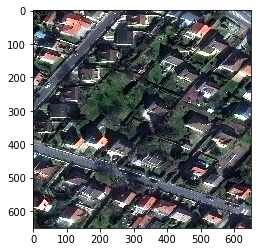

In [167]:
plt.imshow(pred_values)

In [ ]:
preds_big = _internal_validate_predict_best_param(3, slice_pred_list=[preds])
x_big = _internal_validate_predict_best_param(3, slice_pred_list=[denorm(x)[...,0]])
y_big = _internal_validate_predict_best_param(3, slice_pred_list=[y])
x_big[0].shape

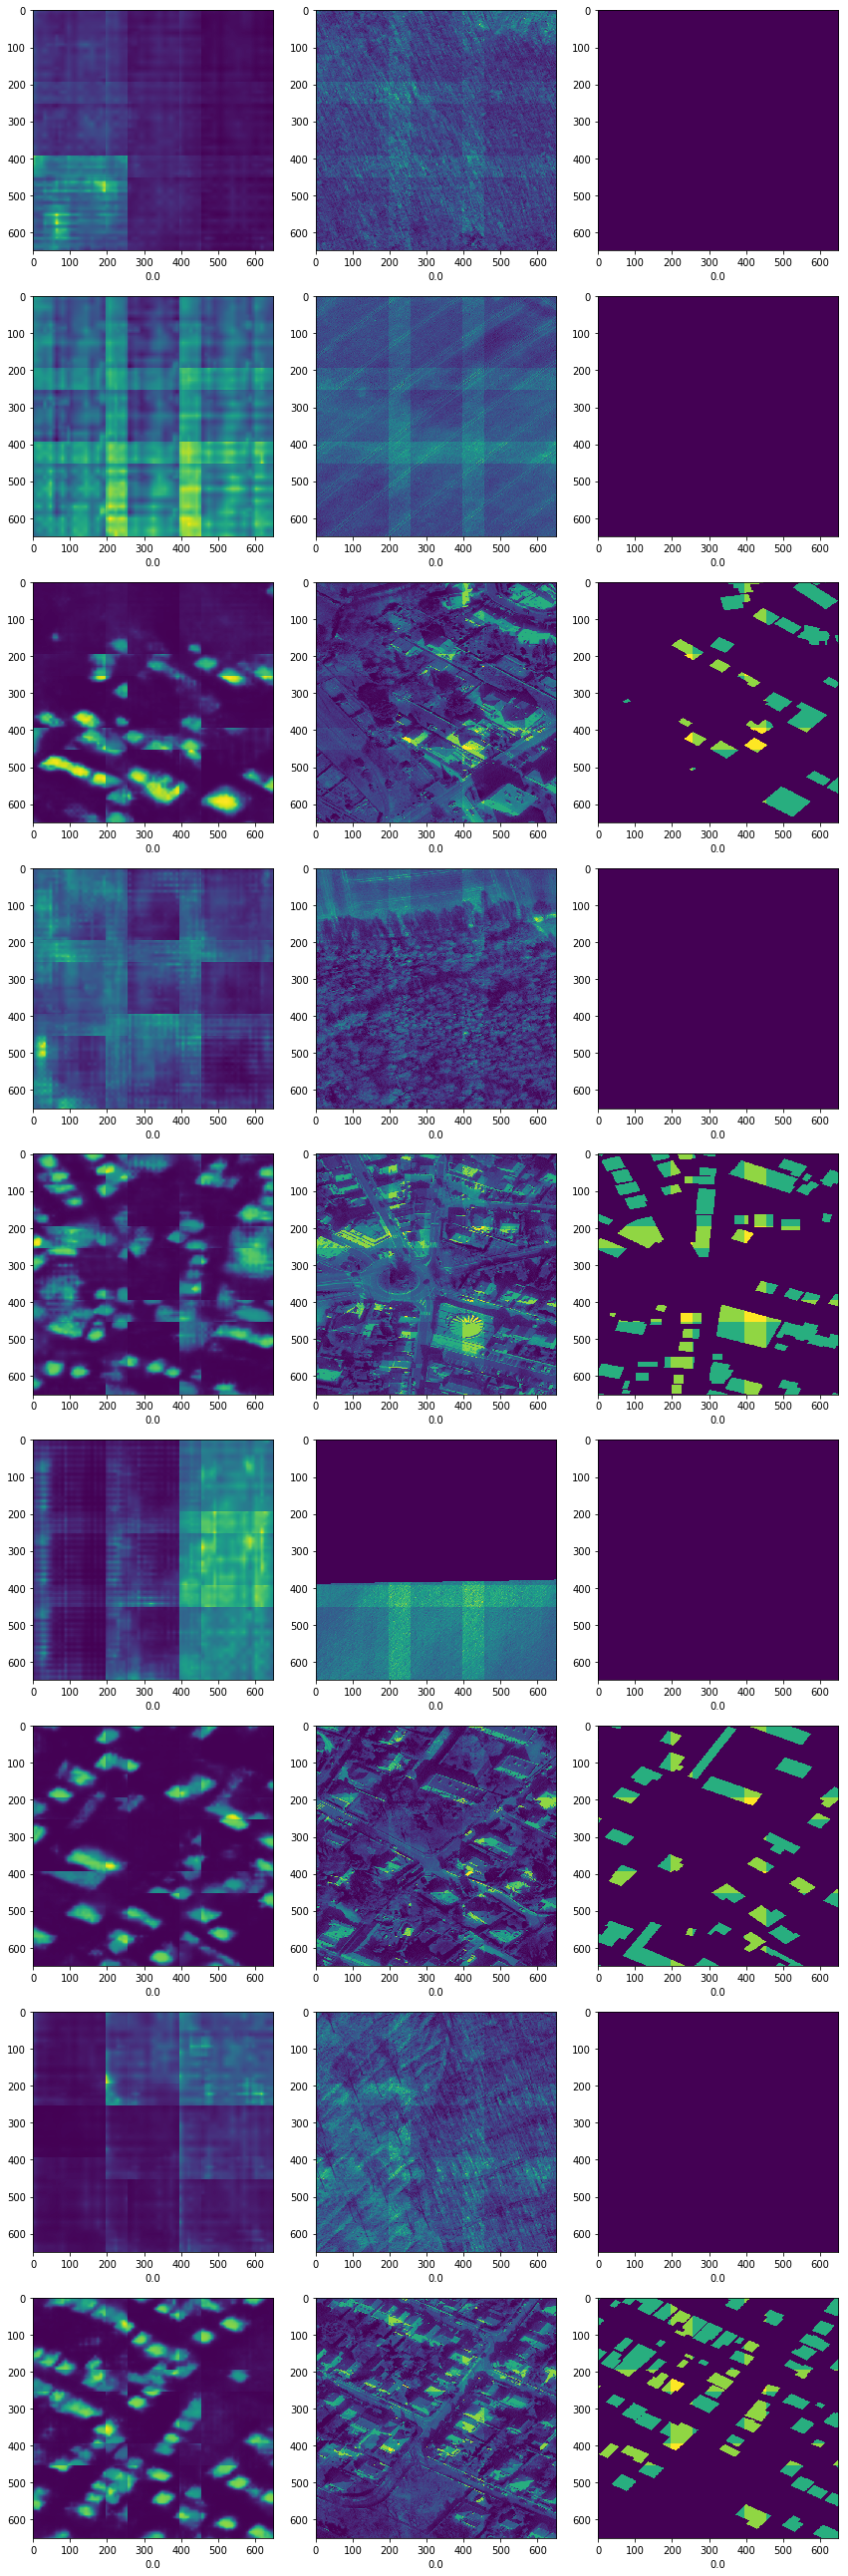

In [178]:
idx = 23
data_im = zip(preds_big[idx * 9:idx * 9 + 9], x_big[idx * 9:idx * 9 + 9], y_big[idx * 9:idx * 9 + 9])
plot_ims(data_im, figsize=4)

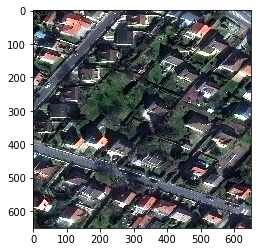

In [95]:
plt.imshow(learn.data.val_ds.x[25])

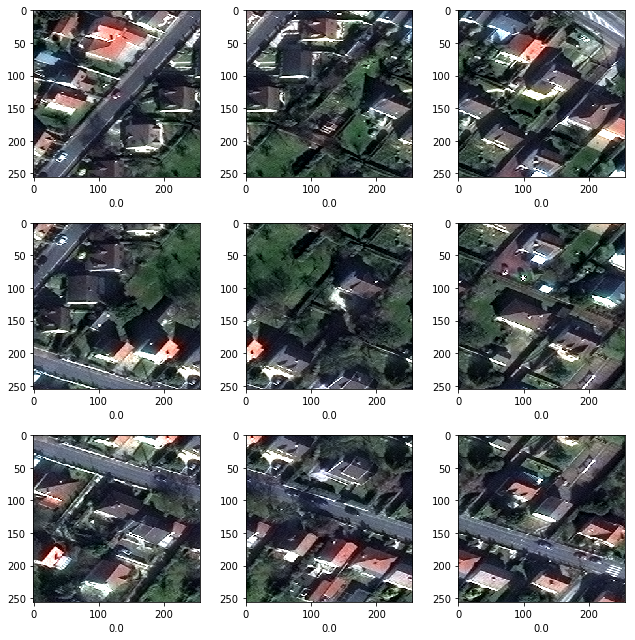

In [116]:
idx = 25
tx = denorm(x[idx * 9:idx * 9 + 16])
data_im = zip(tx[np.arange(0, 9, 3)],tx[np.arange(1, 9, 3)], tx[np.arange(2, 9, 3)])
plot_ims(data_im, figsize=3)

In [134]:
fn_out = FMT_VALTESTTRUTH_PATH.format('AOI_3_Paris')
with open(fn_out, 'r') as f:
    t = f.readlines()
[o for o in t if 'AOI_3_Paris_img100,' in o]

['AOI_3_Paris_img100,1,"POLYGON ((650.0 573.22 0,650.0 525.46 0,614.76 555.35 0,650.0 573.22 0))",1.000000\n',
 'AOI_3_Paris_img100,2,"POLYGON ((561.49 527.13 0,607.18 551.2 0,628.42 533.88 0,582.73 509.8 0,561.49 527.13 0))",1.000000\n',
 'AOI_3_Paris_img100,3,"POLYGON ((494.42 551.78 0,444.05 594.14 0,523.98 635.01 0,574.35 592.65 0,494.42 551.78 0))",1.000000\n',
 'AOI_3_Paris_img100,4,"POLYGON ((605.94 270.32 0,638.69 287.63 0,650.0 278.43 0,650.0 271.69 0,622.28 257.03 0,605.94 270.32 0))",1.000000\n',
 'AOI_3_Paris_img100,5,"POLYGON ((618.25 360.21 0,549.19 324.89 0,533.45 338.12 0,549.68 346.43 0,509.39 380.3 0,562.22 407.32 0,618.25 360.21 0))",1.000000\n',
 'AOI_3_Paris_img100,6,"POLYGON ((524.27 324.01 0,473.84 298.1 0,447.27 320.34 0,458.35 326.03 0,451.89 331.43 0,489.14 350.57 0,504.96 337.33 0,507.06 338.41 0,524.27 324.01 0))",1.000000\n',
 'AOI_3_Paris_img100,7,"POLYGON ((257.46 499.97 0,245.84 505.78 0,252.18 511.22 0,263.79 505.41 0,257.46 499.97 0))",1.000000\n',
 'A